# Task 2

## General instructions

First, update the following cell to have a link to your Homework 2 GitHub repository

**LINK**
https://github.com/ccaswell25/eds220-hwk-2

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.


## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County. 

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

In [33]:
### ===== FINAL CODE =====

import pandas as pd #import pandas 
import matplotlib.pyplot as plt #import matplotlib
aqi_17 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip") #read in 2017 data
aqi_18 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip") #read in 2018 data
aqi = pd.concat([aqi_17, aqi_18]) #combine the dataframes
aqi = aqi.reset_index(drop=True) #fixing the index
aqi.columns = aqi.columns.str.lower().str.replace(' ','_') #updating columns to lowercase
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara'].copy() # Selecting data from 'Santa Barbara' county
columns_to_drop = ['state_name', 'county_name', 'state_code', 'county_code'] # Specifying columns to drop
aqi_sb.drop(columns_to_drop, inplace=True, axis = 1) # Dropping specified columns
aqi_sb['date'] = pd.to_datetime(aqi_sb['date']) # Updating the date column to a datetime object
aqi_sb.set_index('date', inplace=True) #Setting the index to the date column
aqi_sb.aqi.rolling('5D').mean() #Calculating 5 day moving average for aqi
aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean() #Adding this as a new column titles five_day_average
plt.figure(figsize=(12, 6)) #Create canvas for lineplot
plt.plot(aqi_sb.index, aqi_sb['aqi'], label='Daily AQI', color='cornflowerblue') #Create line for daily aqi
plt.plot(aqi_sb.index, aqi_sb['five_day_average'], label='5-Day Average', color='salmon') #create line for five day average
plt.title('AQI and 5-Day Average') #Add a title
plt.xlabel('Date') #Add an x axis label
plt.ylabel('AQI') #Add a y axis label
plt.legend() #Add a legend
plt.show() #Show the plot


## 1

1. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 
2. Under "Donwload Data" click on "Pre-generated Data Files"
3. Click on "Tables of Daily AQI"
4. Copy the URL to the 2017 Daily AQI **by County** zip file `daily_aqi_by_county_2017.zip`
5. In the next code cell read in the data from the URL using the `pd.read_csv` function and store it as `aqi_17`. 
6. In the same cell, read in the data for the 2018 Daily AQI by County zip file and store it as `aqi_18`.

In [4]:
#Importing libraries:
import pandas as pd 
import matplotlib.pyplot as plt


# Reading in the data:
aqi_17 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip")
aqi_18 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip")

## 2 
(a) and (b) Use the next two cells to look at the head of both data frames.

(c) Use this cell to make some other preliminary data exploration of your choosing.

In [5]:
#Taking an initial look at my 2017 dataframe:
aqi_17.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,19,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,30,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,16,Good,PM2.5,01-003-0010,1


In [6]:
#Taking an initial look at my 2018 dataframe:
aqi_18.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2018-01-02,32,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2018-01-05,34,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2018-01-08,15,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2018-01-11,19,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2018-01-14,25,Good,PM2.5,01-003-0010,1


In [7]:
#Additional data exploration to display the columns and shape of the dataframes:
aqi_17.columns
aqi_18.columns

aqi_17.shape
aqi_18.shape

(327537, 10)

## 3
We currently have two separate dataframes. For this exercise we will need to "glue" them one on top of the other. The pandas function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

👀 NOTE: When we concatenate like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the index of `aqi` ends in 327536 while it has 654338 rows.


In [8]:
# Combining the dataframes
aqi = pd.concat([aqi_17, aqi_18])

# Fixing the index
aqi = aqi.reset_index(drop=True)
aqi

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,19,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,30,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,16,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
654333,Wyoming,Weston,56,45,2018-12-27,36,Good,Ozone,56-045-0003,1
654334,Wyoming,Weston,56,45,2018-12-28,35,Good,Ozone,56-045-0003,1
654335,Wyoming,Weston,56,45,2018-12-29,35,Good,Ozone,56-045-0003,1
654336,Wyoming,Weston,56,45,2018-12-30,31,Good,Ozone,56-045-0003,1


## 4

Run the follwoing cell and read the comments to understand how the column names are being updated.

In [9]:
# initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# re-assign the column names - .str.lower() makes them lower case
aqi.columns = aqi.columns.str.lower()
print(aqi.columns, '\n')

#  re-assign the column names again - .str.replace(' ','_') replaces the space for _
aqi.columns = aqi.columns.str.replace(' ','_')
print(aqi.columns)

# as a "one liner" you could achieve this column name cleaning like this:
# aqi.columns = aqi.columns.str.lower().str.replace(' ','_')

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state name', 'county name', 'state code', 'county code', 'date', 'aqi',
       'category', 'defining parameter', 'defining site',
       'number of sites reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object')


## 5 
In the next cell:
- Select only data from `Santa Barbara` county and store in a new variable `aqi_sb`.
- Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`. 
- Use the `dtypes` attribute to check the data types of the columns. What do you notice for the date column?

In [21]:
# Selecting data from 'Santa Barbara' county
aqi_sb = aqi[aqi['county_name'] == 'Santa Barbara'].copy()

# Dropping specified columns
columns_to_drop = ['state_name', 'county_name', 'state_code', 'county_code']
aqi_sb.drop(columns_to_drop, inplace=True, axis = 1)

# Checking data types of the columns
print(aqi_sb.dtypes)

#The data column is stored as an object and it needs to be converted to datetime!

date                         object
aqi                           int64
category                     object
defining_parameter           object
defining_site                object
number_of_sites_reporting     int64
dtype: object


## 6
In the next cell:
1. Update the date column of `aqi_sb` to be a datetime object.
2. Update the index of `aqi_sb` to be the date column.

In [22]:
# Updating the date column to a datetime object
aqi_sb['date'] = pd.to_datetime(aqi_sb['date'])

# Setting the index to the date column
aqi_sb.set_index('date', inplace=True)

# Printing the updated DataFrame
aqi_sb


,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
date,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12
2017-01-02,36,Good,Ozone,06-083-4003,11
2017-01-03,71,Moderate,PM10,06-083-4003,12
2017-01-04,34,Good,Ozone,06-083-4003,13
2017-01-05,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...
2018-12-27,37,Good,Ozone,06-083-1025,11
2018-12-28,39,Good,Ozone,06-083-1021,12
2018-12-29,39,Good,Ozone,06-083-1021,12


## 7
In the next cell, check that you've updated the index by accessing the index of `aqi_sb`  by running `aqi_sb.index`. Add in a comment what is the data type (dtype) of the index.

In [23]:
# Checking the index
aqi_sb.index
#the data type is datetime, which looks correct! 

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=730, freq=None)

## 8
Run the next cell and read through the comments. They will explain how to calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html).




In [24]:
# rolling() is a method for pandas.series that provides rolling window calculations
# the parameter '5D' indicates we want the window to be 5 days
# This is a lazy method (think groupby), we need to specify what we want to calculate over each window
# here we add the aggregator function mean()
# this indicates we want the mean over each window
# and we get a pd.Series as ouput
aqi_sb.aqi.rolling('5D').mean()

date
2017-01-01    39.000000
2017-01-02    37.500000
2017-01-03    48.666667
2017-01-04    45.000000
2017-01-05    43.400000
                ...    
2018-12-27    38.600000
2018-12-28    38.600000
2018-12-29    38.200000
2018-12-30    37.800000
2018-12-31    38.400000
Name: aqi, Length: 730, dtype: float64

## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named 'five_day_average' to the `aqi_sb` dataframe. 

In [25]:
# Adding a new column with the 5-day rolling mean:
aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()


## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Update the title and colors of the graph. Can you see the AQI going up during the Thomas Fire in December 2017?

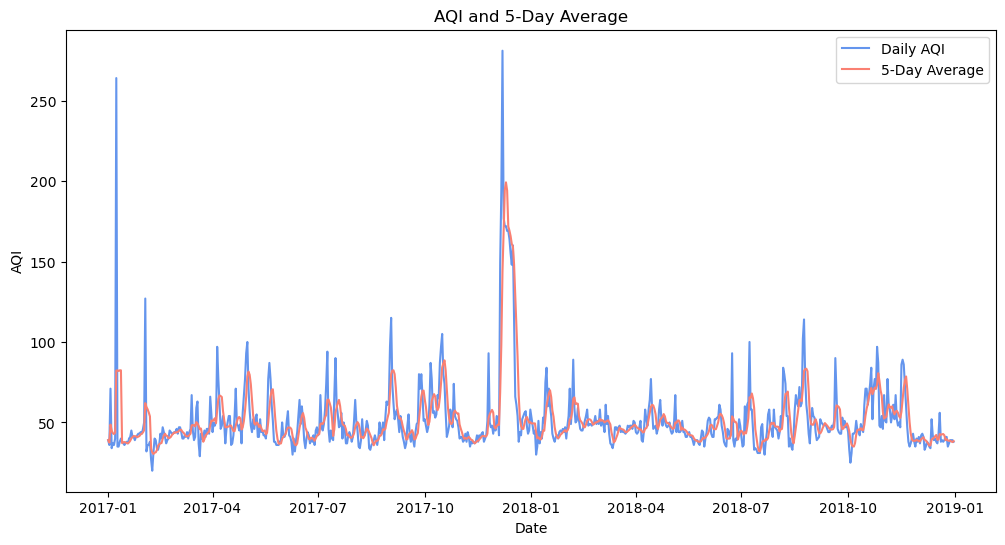

In [32]:
#Import matplot
import matplotlib.pyplot as plt

#Line plot of the AQI 5-day average:
plt.figure(figsize=(12, 6))
plt.plot(aqi_sb.index, aqi_sb['aqi'], label='Daily AQI', color='cornflowerblue')
plt.plot(aqi_sb.index, aqi_sb['five_day_average'], label='5-Day Average', color='salmon')
plt.title('AQI and 5-Day Average')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

## 11

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.